In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
import seaborn as sns
from haversine import haversine, Unit

In [2]:
# Load data
cities_df = pd.DataFrame(pd.read_csv('data/cities.csv', encoding='latin1'))
monuments_df = pd.DataFrame(pd.read_csv('data/monuments.csv', encoding='latin1'))

# Drop all columns we will no longer need in this study
cities_df = cities_df.drop(columns=['Barrington Atlas Rank', 'Barrington Atlas Reference', 'Select Bibliography'])

In [3]:
# Display first few rows of the cities dataset
cities_df.head()

,Primary Key,Ancient Toponym,Modern Toponym,Province,Country,Start Date,End Date,Longitude (X),Latitude (Y)
0,Hanson2016_1,Abae,Kalapodi,Achaea,Greece,-600,NaN,22.933333,38.583333
1,Hanson2016_2,Acharnae,Acharnes,Achaea,Greece,-600,NaN,23.734088,38.083473
2,Hanson2016_3,Acraephia,Akraifnio,Achaea,Greece,-600,NaN,23.219702,38.452606
3,Hanson2016_4,Aegina,Aigina,Achaea,Greece,-600,NaN,23.428500,37.750074
4,Hanson2016_5,Aegira,Aigeira,Achaea,Greece,-600,NaN,22.355720,38.147951


In [4]:
# Group cities by province and by country to get more insight in the cities df
city_count = cities_df.groupby(['Country', 'Province']).size().reset_index(name='City Count')

# Describe grouped dataframe
city_count.describe()


,City Count
count,103.000000
mean,13.475728
std,18.555610
min,1.000000
25%,2.000000
50%,6.000000
75%,16.500000
max,103.000000


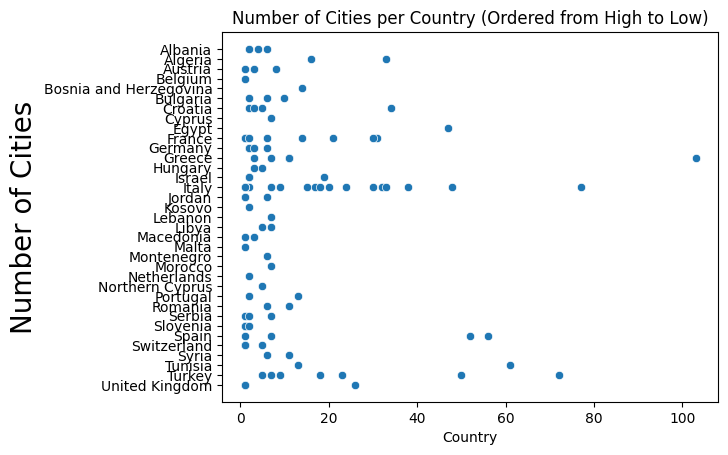

In [5]:
# Create the bar chart
sns.scatterplot(data=city_count, x='City Count', y='Country')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Number of Cities', fontsize=20)
plt.title('Number of Cities per Country (Ordered from High to Low)')

# Show the plot
plt.show()

In [6]:
# Display first few rows of the areas dataset
monuments_df.head()

,Primary Key,Structure
0,Hanson2016_1,Acropolis
1,Hanson2016_1,Agora
2,Hanson2016_1,Temple of Apollo
3,Hanson2016_1,Theatre
4,Hanson2016_1,Walls


In [ ]:
# QUESTION 1: Does a city's distance from Rome affect the number of monuments found in that city?
# To do this, let's first calculate the relative distance for every city to Rome by defining a function using the longitude and lattitude coordinates of the cities.

# Define function
def calculate_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    # Compute differences
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Distance in kilometers
    distance = R * c

    return distance

In [ ]:
# Apply the function where lat1 and lon1 represent a city's coordinates, and lat2 and lon2 represent Rome's coordinates, and store the outcome in a column 'Distance to Rome (km)'
cities_df['Distance to Rome (km)'] = cities_df.apply(lambda row: calculate_distance(row['Latitude (Y)'], row['Longitude (X)'], cities_df[cities_df['Ancient Toponym']=='Roma']['Latitude (Y)'].values, cities_df[cities_df['Ancient Toponym']=='Roma']['Longitude (X)'].values), axis=1)
cities_df

/tmp/ipykernel_60550/1388479858.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lat2 = radians(lat2)
/tmp/ipykernel_60550/1388479858.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lon2 = radians(lon2)


,Primary Key,Ancient Toponym,Modern Toponym,Province,Country,Start Date,End Date,Longitude (X),Latitude (Y),Distance to Rome (km)
0,Hanson2016_1,Abae,Kalapodi,Achaea,Greece,-600,NaN,22.933333,38.583333,959.355610
1,Hanson2016_2,Acharnae,Acharnes,Achaea,Greece,-600,NaN,23.734088,38.083473,1046.706167
2,Hanson2016_3,Acraephia,Akraifnio,Achaea,Greece,-600,NaN,23.219702,38.452606,988.120928
3,Hanson2016_4,Aegina,Aigina,Achaea,Greece,-600,NaN,23.428500,37.750074,1040.864382
4,Hanson2016_5,Aegira,Aigeira,Achaea,Greece,-600,NaN,22.355720,38.147951,937.218895
...,...,...,...,...,...,...,...,...,...,...
1383,Hanson2016_1384,Pautalia,Kyustendi,Thracia,Bulgaria,98,NaN,22.680752,42.282517,841.956552
1384,Hanson2016_1385,Philippopolis (Thracia),Plovdiv,Thracia,Bulgaria,-342,NaN,24.750913,42.146652,1012.780172
1385,Hanson2016_1386,Samothrace,Samothrace,Thracia,Greece,-700,NaN,25.529249,40.500693,1101.209420
1386,Hanson2016_1387,Serdica,Sophia,Thracia,Bulgaria,45,NaN,23.342891,42.722826,896.996782


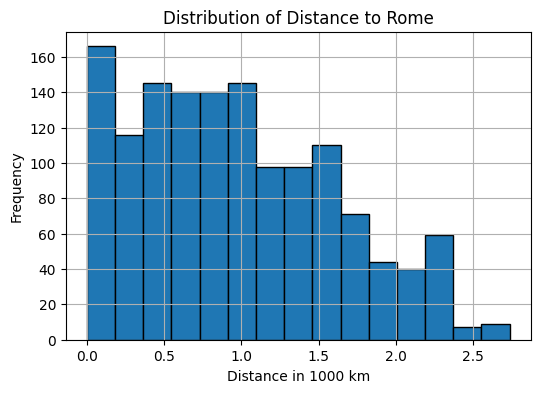

In [ ]:
# Create a distribution plot of distance to Rome (km) to see if we see anything out of the ordinary
plt.figure(figsize=(6, 4))
plt.hist(cities_df['Distance to Rome (km)']/1000, bins=15, edgecolor='black')
plt.title('Distribution of Distance to Rome')
plt.xlabel('Distance in 1000 km')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [10]:
# Calculate number of monuments per primary key
monuments_piv = monuments_df.pivot_table(index='Primary Key', aggfunc='size')
monuments_piv = monuments_piv.rename('Monument count')
monuments_piv_df = monuments_piv.reset_index()
monuments_piv_df

,Primary Key,Monument count
0,Hanson2016_,1
1,Hanson2016_1,5
2,Hanson2016_10,4
3,Hanson2016_100,21
4,Hanson2016_1000,1
...,...,...
1203,Hanson2016_993,6
1204,Hanson2016_995,6
1205,Hanson2016_996,2
1206,Hanson2016_998,5


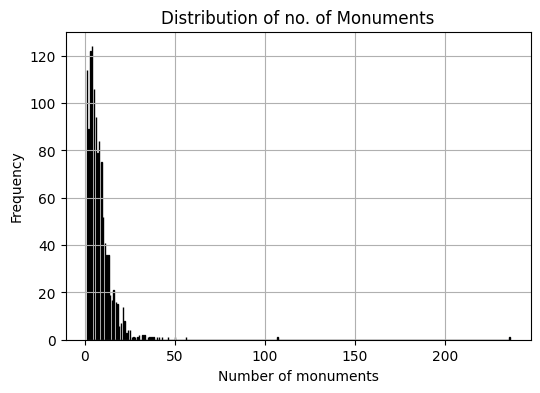

Looks like the majority of cities have <50 monuments. However, there are a few cities with a huge number of monuments, with the absolute winner having 236 monuments!


In [11]:
# Create a distribution plot of number of monuments per city
plt.figure(figsize=(6, 4))
plt.hist(monuments_piv_df['Monument count'], bins=1000, edgecolor='black')
plt.title('Distribution of no. of Monuments')
plt.xlabel('Number of monuments')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(f'Looks like the majority of cities have <50 monuments. However, there are a few cities with a huge number of monuments, with the absolute winner having {monuments_piv_df['Monument count'].max()} monuments!')

In [12]:
# Join number of monuments to cities df with left-outer so that: a) monuments found in cities we have no data about are left out, and b) cities in our dataset where no 
df = pd.merge(cities_df, monuments_piv_df, on='Primary Key', how='left')
df['Monument count'].replace(np.nan, 0, inplace=True)

# Create boolean column to indicate whether or not a city has a Roman monument
df['Monument bool'] = df['Monument count'] != 0
df

/tmp/ipykernel_60550/4045764679.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Monument count'].replace(np.nan, 0, inplace=True)


,Primary Key,Ancient Toponym,Modern Toponym,Province,Country,Start Date,End Date,Longitude (X),Latitude (Y),Distance to Rome (km),Monument count,Monument bool
0,Hanson2016_1,Abae,Kalapodi,Achaea,Greece,-600,NaN,22.933333,38.583333,959.355610,5.0,True
1,Hanson2016_2,Acharnae,Acharnes,Achaea,Greece,-600,NaN,23.734088,38.083473,1046.706167,3.0,True
2,Hanson2016_3,Acraephia,Akraifnio,Achaea,Greece,-600,NaN,23.219702,38.452606,988.120928,7.0,True
3,Hanson2016_4,Aegina,Aigina,Achaea,Greece,-600,NaN,23.428500,37.750074,1040.864382,8.0,True
4,Hanson2016_5,Aegira,Aigeira,Achaea,Greece,-600,NaN,22.355720,38.147951,937.218895,8.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1383,Hanson2016_1384,Pautalia,Kyustendi,Thracia,Bulgaria,98,NaN,22.680752,42.282517,841.956552,11.0,True
1384,Hanson2016_1385,Philippopolis (Thracia),Plovdiv,Thracia,Bulgaria,-342,NaN,24.750913,42.146652,1012.780172,12.0,True
1385,Hanson2016_1386,Samothrace,Samothrace,Thracia,Greece,-700,NaN,25.529249,40.500693,1101.209420,6.0,True
1386,Hanson2016_1387,Serdica,Sophia,Thracia,Bulgaria,45,NaN,23.342891,42.722826,896.996782,9.0,True


In [ ]:
# As we saw in the previous histogram, there are two cities that have an abnormal amount of monuments
top_5_monuments = pd.DataFrame(df[['Ancient Toponym', 'Monument count']].nlargest(2, 'Monument count'))
print(top_5_monuments)

    Ancient Toponym  Monument count
991            Roma           236.0
13          Athenae           107.0


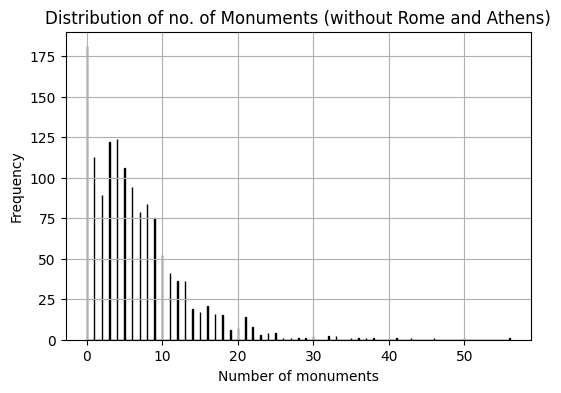

In [ ]:
# Exclude Rome and Athens from dataset as they are not representative for the target variable
dff = df[~df['Ancient Toponym'].isin(['Roma', 'Athenae'])]

# Create a distribution plot of number of monuments per city
plt.figure(figsize=(6, 4))
plt.hist(dff['Monument count'], bins=1000, edgecolor='black')
plt.title('Distribution of no. of Monuments (without Rome and Athens)')
plt.xlabel('Number of monuments')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Create train and test split
X = pd.DataFrame(dff['Distance to Rome (km)'])
y = pd.DataFrame(dff['Monument count'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
y_train.head()

,Monument count
1002,3.0
290,9.0
1158,17.0
1141,20.0
950,0.0


Intercept: [6.18904677]
Slope: [0.00047205]


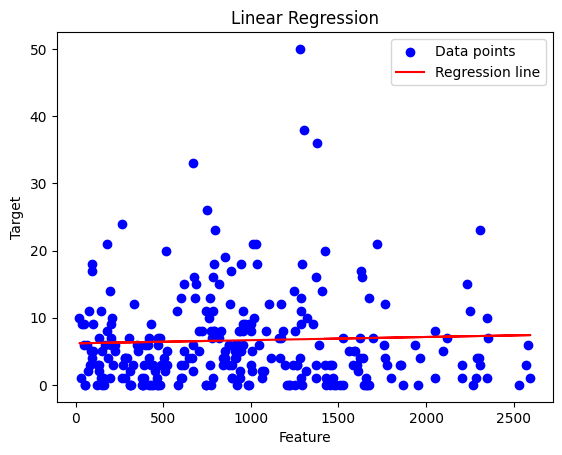

In [37]:
# Perform linear regression on distance to Rome and number of monumentsd
lrm = LinearRegression()
lrm.fit(X_train, y_train)

# Get the intercept and slope
intercept = lrm.intercept_
slope = lrm.coef_[0]

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

# Plot the data points
plt.scatter(X_test, y_test, color='blue', label='Data points')

# Plot the regression line
regression_line = slope * X_test + intercept
plt.plot(X_test, regression_line, color='red', label='Regression line')

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()

# Show the plot
plt.show()

In [38]:
# Make y predictions
y_pred = lrm.predict(X_test)

# R2 score of prediction model
r2 = r2_score(y_test, y_pred)
print(f'The R2 score of this model is {round(r2, 4)}. This means nearly none of the variance in the data can be explained by the model, suggesting there is nearly no relation between the number of monuments found in a city and its distance from Rome')

The R2 score of this model is -0.0026. This means nearly none of the variance in the data can be explained by the model, suggesting there is nearly no relation between the number of monuments found in a city and its distance from Rome


In [39]:
# Check proportion of cities that have no monuments
perc_monument = df['Monument bool'].sum() / df.shape[0]
perc_monument

np.float64(0.8695965417867435)

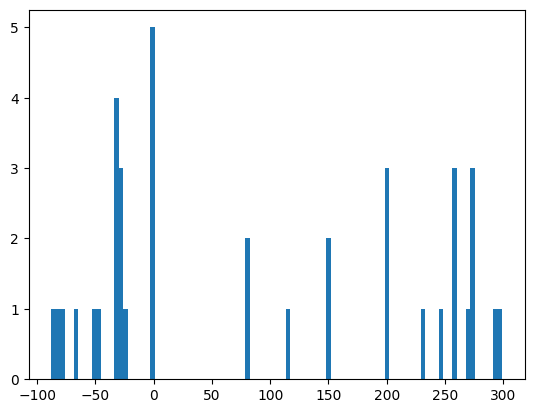

In [40]:
# QUESTION 2: Is there a relation between how long a city has been part of the Roman Empire and the number of monuments found?
# First, let's see when cities that do not exist anymore, stopped existing.

plt.hist(df['End Date'][df['End Date'].isna()!=True], bins=100)
plt.show()

In [41]:
# Let's now see how many cities do no exist anymore today and for what percentage of the dataset this is the case.
# Create boolean column if city still exists

df['Exists bool'] = df['End Date'].isna()
perc_exists = df['Exists bool'].sum() / df.shape[0]

number_not_exist = df.shape[0] - df['Exists bool'].sum()
print(f'In total, {number_not_exist} cities in the dataset do not exist anymore. That is {round(perc_exists, 2)}%.')

In total, 38 cities in the dataset do not exist anymore. That is 0.97%.


In [42]:
# Now, let's calculate the years a city has been part of the Roman Empire - which we will call 'Age'.
# For the cities that still exist today, we calculate this number by using a fictive End Date of 476 A.D.
# This particular year is commonly seen as the offical end of the Western Roman Empire.

df['Age'] = df.apply(lambda row: 476 - row['Start Date'] if row['Exists bool'] else row['End Date']- row['Start Date'], axis=1)
df

,Primary Key,Ancient Toponym,Modern Toponym,Province,Country,Start Date,End Date,Longitude (X),Latitude (Y),Distance to Rome (km),Monument count,Monument bool,Exists bool,Age,Temple count,Temple count dum,End Date dum
0,Hanson2016_1,Abae,Kalapodi,Achaea,Greece,-600,NaN,22.933333,38.583333,959.355610,5.0,True,True,1076.0,1.0,1.0,1
1,Hanson2016_2,Acharnae,Acharnes,Achaea,Greece,-600,NaN,23.734088,38.083473,1046.706167,3.0,True,True,1076.0,NaN,0.0,1
2,Hanson2016_3,Acraephia,Akraifnio,Achaea,Greece,-600,NaN,23.219702,38.452606,988.120928,7.0,True,True,1076.0,2.0,2.0,1
3,Hanson2016_4,Aegina,Aigina,Achaea,Greece,-600,NaN,23.428500,37.750074,1040.864382,8.0,True,True,1076.0,3.0,3.0,1
4,Hanson2016_5,Aegira,Aigeira,Achaea,Greece,-600,NaN,22.355720,38.147951,937.218895,8.0,True,True,1076.0,4.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,Hanson2016_1384,Pautalia,Kyustendi,Thracia,Bulgaria,98,NaN,22.680752,42.282517,841.956552,11.0,True,True,378.0,3.0,3.0,1
1384,Hanson2016_1385,Philippopolis (Thracia),Plovdiv,Thracia,Bulgaria,-342,NaN,24.750913,42.146652,1012.780172,12.0,True,True,818.0,1.0,1.0,1
1385,Hanson2016_1386,Samothrace,Samothrace,Thracia,Greece,-700,NaN,25.529249,40.500693,1101.209420,6.0,True,True,1176.0,1.0,1.0,1
1386,Hanson2016_1387,Serdica,Sophia,Thracia,Bulgaria,45,NaN,23.342891,42.722826,896.996782,9.0,True,True,431.0,1.0,1.0,1


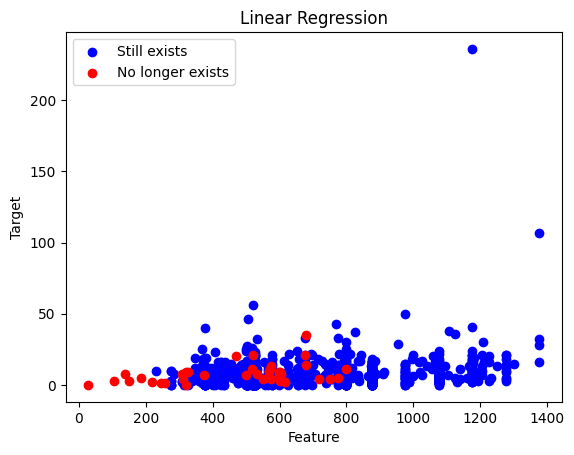

In [43]:
# To get a bit more understanding of the data let's plot our 'Age' (feature) and 'Monuments count' (target) in a scatterplot.
# And let's color them based on if the city still exists or not, just to see if we can spot anything unexpected.
plt.scatter(df['Age'][df['Exists bool']], df['Monument count'][df['Exists bool']], color='blue', label='Still exists')
plt.scatter(df['Age'][df['Exists bool']!=True], df['Monument count'][df['Exists bool']!=True], color='red', label='No longer exists')

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()

# Show the plot
plt.show()

R2 Score: 0.0204
Intercept: [4.2328804]
Slope: [0.00344387]


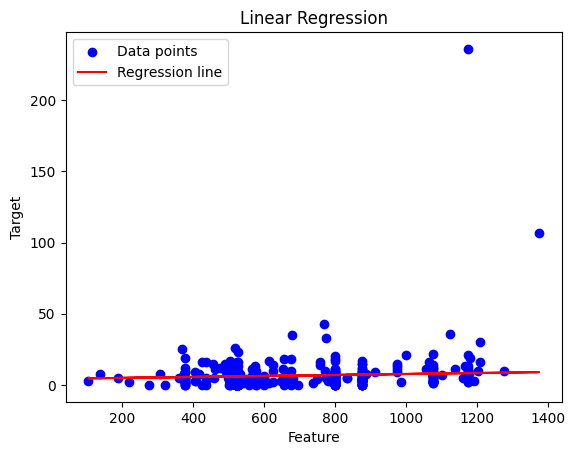

Again, similar to our first analysis, we do not see any evidence on a correlation


In [44]:
# Let's see if 'Age' correlates to the number of monuments in a city
# Create feature and target variables:
age_X = pd.DataFrame(df['Age'])
age_y = pd.DataFrame(df['Monument count'])

# Creat train/test split
age_X_train, age_X_test, age_y_train, age_y_test = train_test_split(age_X, age_y)

# Instantiate and fit our regression model
age_lrm = LinearRegression()
age_lrm.fit(age_X_train, age_y_train)

# Make predictions
age_y_pred = age_lrm.predict(age_X_test)
age_r2 = r2_score(age_y_test, age_y_pred)
print(f'R2 Score: {round(age_r2, 4)}')

# Get the intercept and slope
age_intercept = age_lrm.intercept_
age_slope = age_lrm.coef_[0]
print(f"Intercept: {age_intercept}")
print(f"Slope: {age_slope}")

# Plot the data points
plt.scatter(age_X_test, age_y_test, color='blue', label='Data points')

# Plot the regression line
age_regression_line = age_slope * age_X_test + age_intercept
plt.plot(age_X_test, age_regression_line, color='red', label='Regression line')

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()

# Show the plot
plt.show()

print('Again, similar to our first analysis, we do not see any evidence on a correlation')

In [45]:
# QUESTION 3: What is the probability a temple is found in cities that existed after the non-Christian Western Roman Empire fell (476 A.D.)?
# Hypothetically, when Christianity and Islam became the dominant religions in regions that used to be part of the Roman Empire, one could expect any religous artefact - temples - where demolished.

# First, filter the monuments dataframe where the name of the structure starts with 'Temple'.
temples_df = pd.DataFrame(monuments_df[monuments_df['Structure'].str.startswith('Temple')])
temples_df.describe()

,Primary Key,Structure
count,1845,1845
unique,712,572
top,Hanson2016_992,Temple
freq,85,508


In [46]:
# Calculate number of temples per primary key and store in a dataframe

temples_piv = temples_df.pivot_table(index='Primary Key', aggfunc='size')
temples_piv = temples_piv.rename('Temple count')
temples_piv_df = temples_piv.reset_index()
temples_piv_df

,Primary Key,Temple count
0,Hanson2016_1,1
1,Hanson2016_100,4
2,Hanson2016_1000,1
3,Hanson2016_1002,3
4,Hanson2016_1003,1
...,...,...
707,Hanson2016_991,3
708,Hanson2016_992,85
709,Hanson2016_993,1
710,Hanson2016_996,1


In [47]:
# Join number of monuments to cities df with left-outer so that: a) monuments found in cities we have no data about are left out, and b) cities in our dataset where no 
df = df.merge(temples_piv_df, on='Primary Key', how='left')

In [48]:
# Prepare data for analysis
df['Temple count dum'] =  df['Temple count'].fillna(0)
df['End Date dum'] = np.where(df['End Date'].isna(), 1, 0)

df

KeyError: 'Temple count'

In [ ]:
# Create feature and target variables
temple_X = pd.DataFrame(df['End Date dum'])
temple_y = pd.DataFrame(df['Temple count dum'])

# Create train/test split
temple_X_train, temple_X_test, temple_y_train, temple_y_test = train_test_split(temple_X, temple_y, test_size=0.2, random_state=42)

In [ ]:
temple_lrm = LinearRegression()
temple_lrm.fit(temple_X_train, temple_y_train)

temple_y_pred = temple_lrm.predict(temple_X_test)
temple_r2 = r2_score(temple_y_test, temple_y_pred)
temple_rmse = root_mean_squared_error(temple_y_test, temple_y_pred)
print(temple_r2)
print(temple_rmse)

-0.00020311935460326502
2.4949348168254484


Intercept: [1.86666667]
Slope: [-0.53981481]


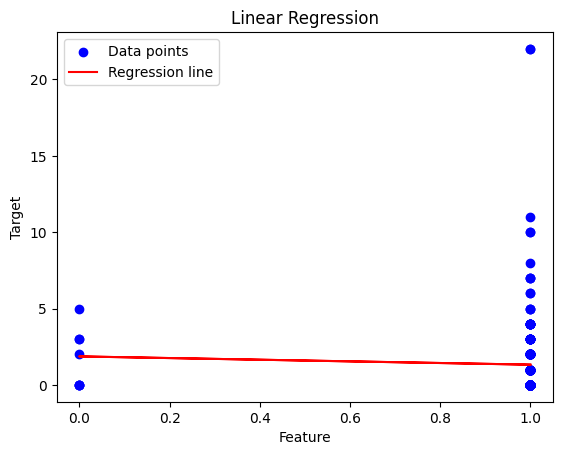

In [ ]:
# Get the intercept and slope
temple_intercept = temple_lrm.intercept_
temple_slope = temple_lrm.coef_[0]
print(f"Intercept: {temple_intercept}")
print(f"Slope: {temple_slope}")

# Plot the data points
plt.scatter(temple_X_test, temple_y_test, color='blue', label='Data points')

# Plot the regression line
temple_regression_line = temple_slope * temple_X_test + temple_intercept
plt.plot(temple_X_test, temple_regression_line, color='red', label='Regression line')

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()

# Show the plot
plt.show()